# Load Libraries

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
df = pd.read_csv('../Data/preprocessed_dataframes/data_trees.csv')
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# Bagging

In [7]:
bagging = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, oob_score=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators':range(1, 200),  # Number of trees in the ensemble
    'max_samples': [50, 60, 70, 80, 90],  # Proportion of training data per tree
    #'max_features': [50, 60, 70, 80, 90, 100, 110]  # Proportion of features per tree
}

# Perform Grid Search with 5-fold cross-validation
bagging_grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
bagging_grid.fit(X, y)

# Save results
df_bagging = pd.DataFrame(bagging_grid.cv_results_)
df_bagging.to_csv('../Data/ensemble_trees_cv_results/ensemble_NAs/CrossValidationResultsBagging.csv')

# Get the best model
print(bagging_grid.best_params_)

Fitting 5 folds for each of 995 candidates, totalling 4975 fits


c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
995 fits failed out of a total of 4975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
995 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^

{'max_samples': 80, 'n_estimators': 45}


Text(0, 0.5, 'Mean test accuracy')

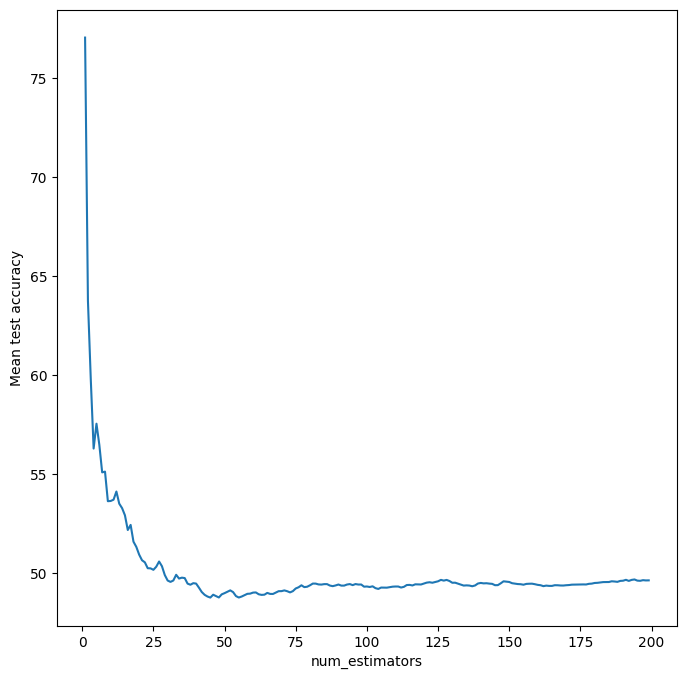

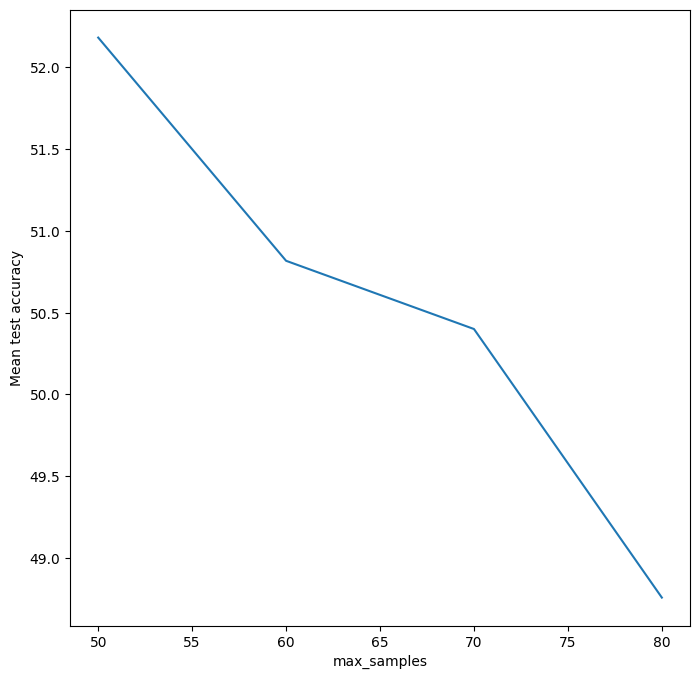

In [8]:
# Read the file
df_bagging = pd.read_csv('../Data/ensemble_trees_cv_results/ensemble_NAs/CrossValidationResultsBagging.csv')

# Add the RMSE value
df_bagging['RMSE'] = np.sqrt(-df_bagging['mean_test_score'])

#Num estimators plot
df_num_estimators = df_bagging[((df_bagging['param_max_samples']==80))]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('Mean test accuracy')

# Num Max samples
df_max_samples = df_bagging[(df_bagging['param_n_estimators']==45)]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_samples')
ax.set_ylabel('Mean test accuracy')

In [28]:
# Cross-validation evaluation
#best_bagging = bagging_grid.best_estimator_
#scores = cross_val_score(best_bagging, X, y, cv=5, scoring='neg_mean_squared_error')
#rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Bagging Regressor: {np.mean(df_bagging['RMSE'].min())}")

Mean RMSE for Bagging Regressor: 48.76020560435742


# Random Forest

In [ ]:
rf = RandomForestRegressor(bootstrap=True, oob_score=True,random_state=0)

# number of trees
n_estimators = range(20,80)
max_features = range(50,116,15)
min_samples_leaf = range(1,5)

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_samples': [50, 70, 80],  # Proportion of training data per tree
    'min_samples_leaf': min_samples_leaf

}

rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
rf_grid.fit(X, y)

# Save the model
# Save results
rf_grid = pd.DataFrame(rf_grid.cv_results_)
rf_grid.to_csv('../Data/ensemble_trees_cv_results/ensemble_NAs/CrossValidationResultsRandomForest.csv')

# Get the best model
#print(rf_grid.best_params_)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


In [28]:
# Add the RMSE variable
rf_grid['RMSE'] = np.sqrt(-rf_grid['mean_test_score'])

best_row = rf_grid.loc[rf_grid['RMSE'].idxmin()]

# Extract best hyperparameters
rf_best_params = {
    'n_estimators': best_row['param_n_estimators'],
    'max_features': best_row['param_max_features'],
    'min_samples_leaf': best_row['param_min_samples_leaf'],
    'max_samples': best_row['param_max_samples']
}
print(rf_best_params)

{'n_estimators': np.int64(22), 'max_features': np.int64(95), 'min_samples_leaf': np.int64(2), 'max_samples': np.int64(70)}


Text(0, 0.5, 'RMSE')

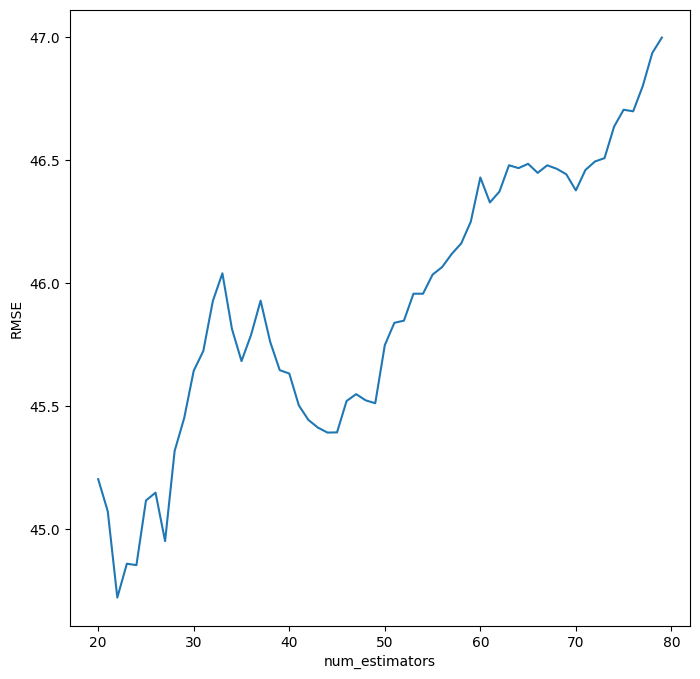

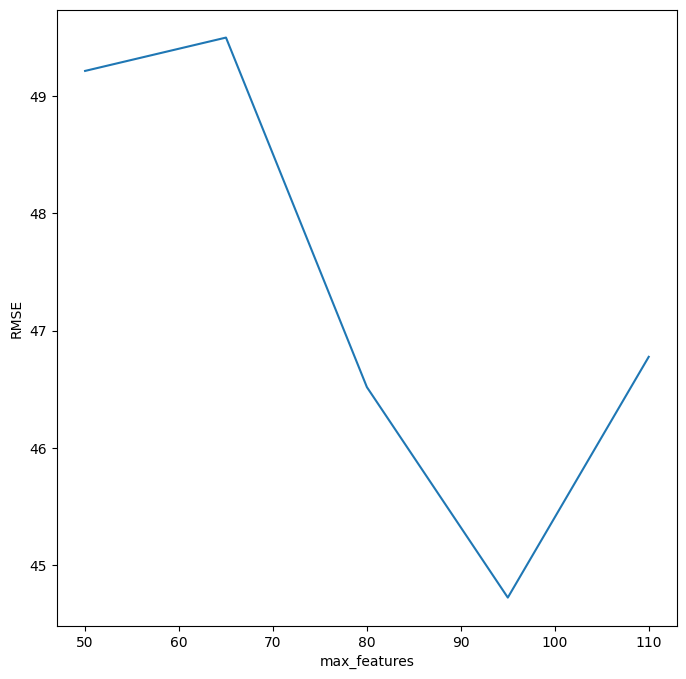

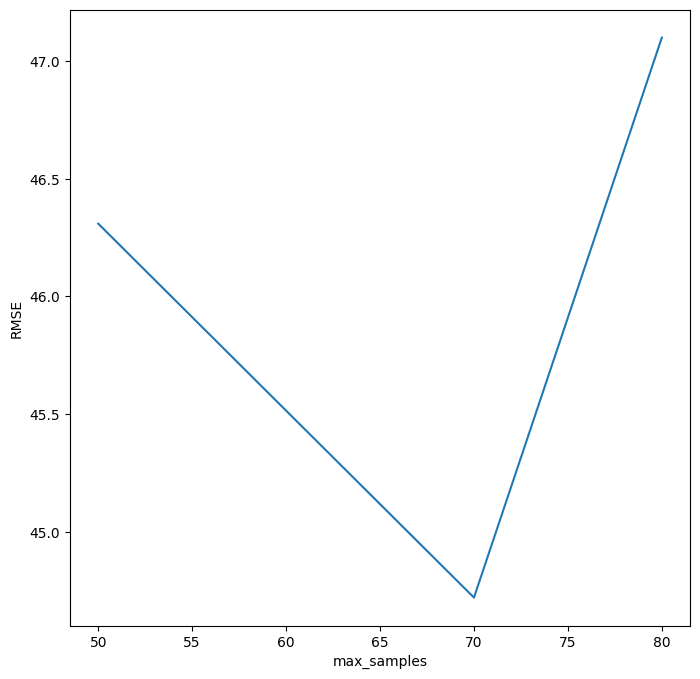

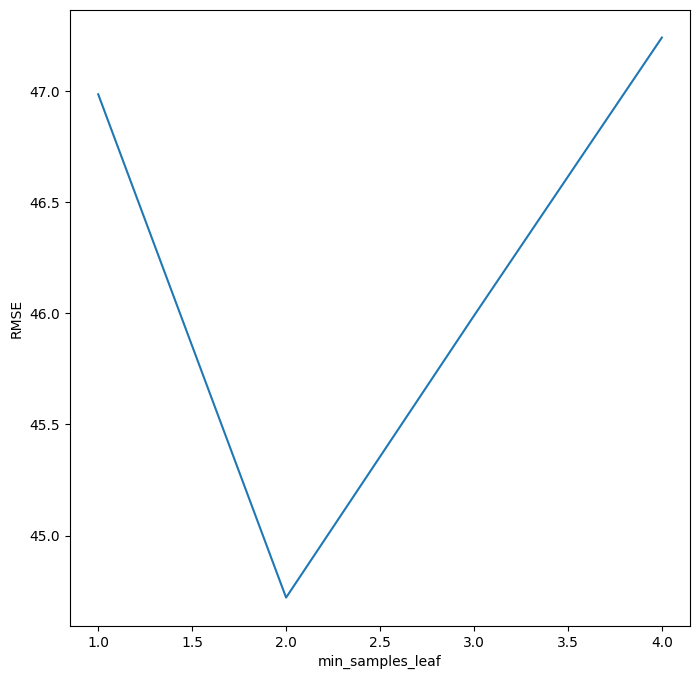

In [29]:
# Plot the number estimators 

df_num_estimators = rf_grid[((rf_grid['param_max_features']==95) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_samples']==70))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_max_features = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_samples']==70))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_features, x='param_max_features', y='RMSE', ax=ax)
ax.set_xlabel('max_features')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_samples = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_features']==95))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_samples')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of Min leaf

df_min_samples_leaf = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_max_samples']==70) & (rf_grid['param_max_features']==95))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_min_samples_leaf, x='param_min_samples_leaf', y='RMSE', ax=ax)
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('RMSE')

In [35]:
print(rf_best_params)

# Cross-validation evaluation
best_rf = rf = RandomForestRegressor(bootstrap=True, oob_score=True,random_state=0, n_estimators=22, max_features= 95, min_samples_leaf=2, max_samples=70)
scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for RF Regressor: {np.mean(rmse_scores)}")

{'n_estimators': np.int64(22), 'max_features': np.int64(95), 'min_samples_leaf': np.int64(2), 'max_samples': np.int64(70)}
Mean RMSE for RF Regressor: 44.2712268400997


In [43]:
from tabulate import tabulate

## Look at the best estimator and the importance of the features
score = best_rf.fit(X, y)
headers = ["name", "score"]
values = sorted(zip(range(0,116), best_rf.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - best_rf.oob_score_))

  name      score
    31  0.551604
    61  0.0735632
    35  0.0378505
    72  0.0303616
    40  0.0199019
    94  0.0189525
    50  0.0156236
    37  0.0143583
    68  0.0120015
    80  0.0100185
Random Forest OOB error rate: 0.4455722232587531


> d) Add five randomly generated, white noise, variables to the dataset and investigate
how you can use their information to derive a cut-off value to select varaibles based
on the variable importances

In [47]:
np.random.seed(3)  
white_noise = np.random.rand(X.shape[0], 5) 
X_with_white_noise_features = np.hstack((X, white_noise))  

# Here we refit the model to the data including the white noise attributes
score = best_rf.fit(X_with_white_noise_features, y)
feature_importances = best_rf.feature_importances_
headers = ["name", "score"]
#Add labels for the white noise features as well
feature_names = [f"Feature {i}" for i in range(116)] + [f"White Noise {i}" for i in range(1, 6)]
values = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances, for cut off look at the sorted list of variables
print(tabulate(values, headers=headers, tablefmt="plain"))

name                 score
Feature 31     0.52736
Feature 61     0.0505087
Feature 35     0.0390278
Feature 29     0.0244122
Feature 72     0.021432
Feature 30     0.0208013
Feature 94     0.0166576
Feature 37     0.0166408
Feature 40     0.0140042
Feature 51     0.013787
Feature 50     0.0111658
Feature 87     0.0106753
White Noise 2  0.00989417
Feature 54     0.00966558
Feature 21     0.00882013
Feature 92     0.00754571
Feature 64     0.0072913
Feature 11     0.00662629
Feature 34     0.00623592
Feature 10     0.00617327
Feature 26     0.00608962
Feature 69     0.00584953
Feature 28     0.00566487
Feature 63     0.00542602
Feature 74     0.00473396
White Noise 5  0.00468572
Feature 13     0.00462267
Feature 88     0.00406967
Feature 15     0.00406852
Feature 83     0.0039014
Feature 84     0.00385035
Feature 33     0.0037901
Feature 48     0.00366582
Feature 42     0.00364835
Feature 25     0.00350889
Feature 17     0.00341673
Feature 80     0.00328654
Feature 68     0.00322406
Feat

# Boosting

In [4]:
# Define boosting model
boosting = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': range(5, 80),
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Perform Grid Search
boosting_grid = GridSearchCV(boosting, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
boosting_grid.fit(X, y)

# Save results
boosting_df = pd.DataFrame(boosting_grid.cv_results_)
boosting_df.to_csv('../Data/ensemble_trees_cv_results/ensemble_NAs/CrossValidationResultsBoosting.csv')

# Get best model
best_boosting = boosting_grid.best_estimator_

# Cross-validation evaluation
scores = cross_val_score(best_boosting, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Gradient Boosting: {np.mean(rmse_scores)}")

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


ValueError: 
All the 6000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\ensemble\_gb.py", line 658, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 1107, in check_array
    _assert_all_finite(
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [30]:
print(boosting_grid.best_estimator_)
# Add the RMSE variable
boosting_df['RMSE'] = np.sqrt(-boosting_df['mean_test_score'])

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=79,
                          random_state=42)


Text(0, 0.5, 'RMSE')

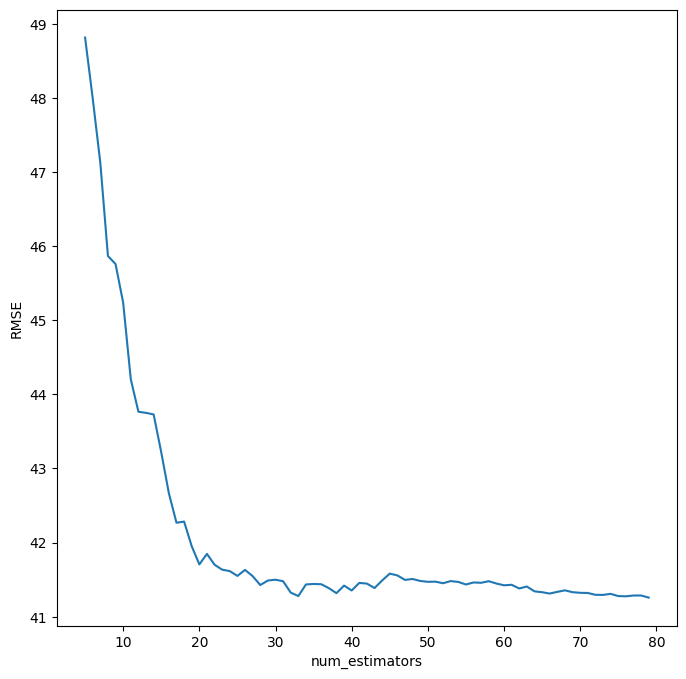

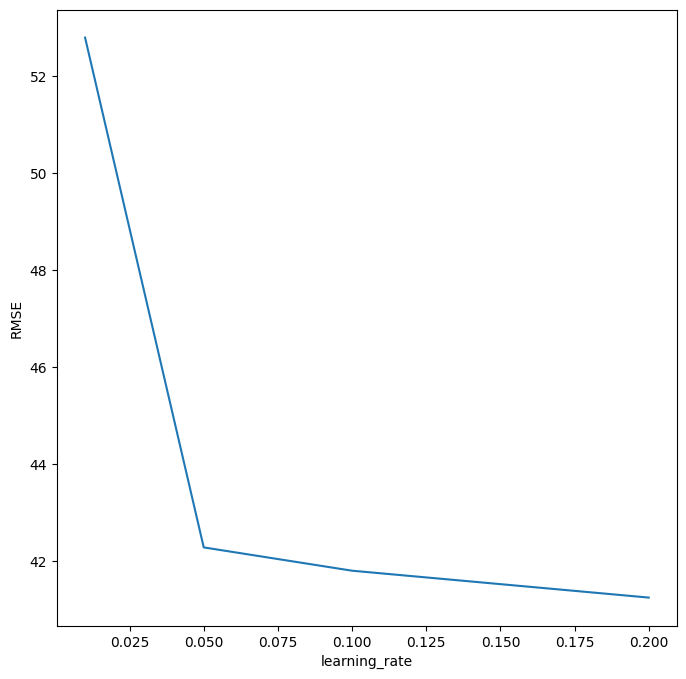

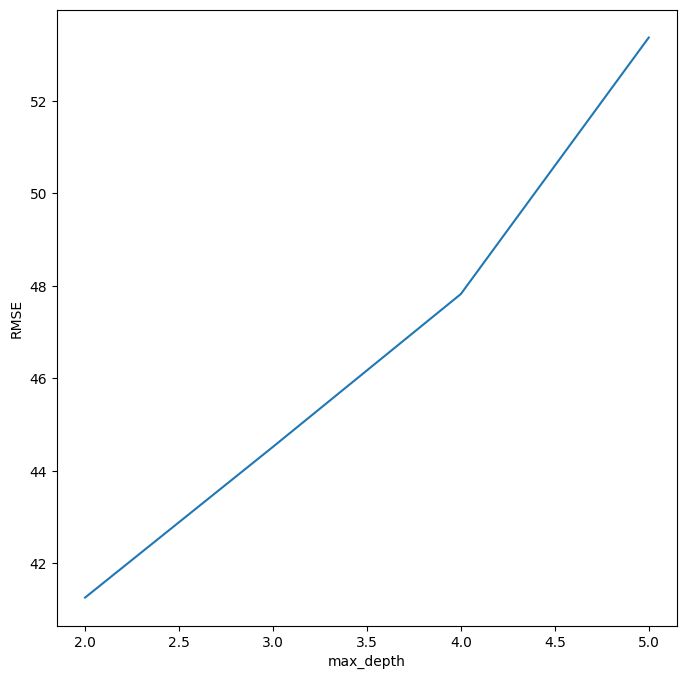

In [31]:
# Plot the number estimators 

df_num_estimators = boosting_df[((boosting_df['param_learning_rate']==0.2) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_learning_rate = boosting_df[((boosting_df['param_n_estimators']==79) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_learning_rate, x='param_learning_rate', y='RMSE', ax=ax)
ax.set_xlabel('learning_rate')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_depth = boosting_df[((boosting_df['param_n_estimators']==79) & (boosting_df['param_learning_rate']==0.2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_depth, x='param_max_depth', y='RMSE', ax=ax)
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE')